In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
len(cpus)

## 2. Load Data

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'utils/data'

# Define data generators
datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2 
)

image_size = (250, 250)
batch_size = 10

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='training'  # Use training subset
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the test set
)


Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


## 4. Making Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

## 5. Training Model

In [10]:
epochs = 20

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/20
8/8 [==============================] - 2s 252ms/step - loss: 2.0294 - accuracy: 0.3889 - val_loss: 1.0909 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 3s 379ms/step - loss: 1.0588 - accuracy: 0.4028 - val_loss: 1.0562 - val_accuracy: 0.3333
Epoch 3/20
8/8 [==============================] - 3s 424ms/step - loss: 1.0196 - accuracy: 0.5000 - val_loss: 0.8741 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 3s 414ms/step - loss: 0.9446 - accuracy: 0.5556 - val_loss: 0.8613 - val_accuracy: 0.5556
Epoch 5/20
8/8 [==============================] - 3s 403ms/step - loss: 0.7027 - accuracy: 0.6944 - val_loss: 0.5484 - val_accuracy: 0.8333
Epoch 6/20
8/8 [==============================] - 3s 405ms/step - loss: 0.4037 - accuracy: 0.8889 - val_loss: 0.4464 - val_accuracy: 0.7778
Epoch 7/20
8/8 [==============================] - 3s 414ms/step - loss: 0.2785 - accuracy: 0.8889 - val_loss: 0.2408 - val_accuracy: 0.9444
Epoch 8/20
8/8 [====

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

9/9 [==============================] - 1s 107ms/step - loss: 0.0025 - accuracy: 1.0000
Test loss: 0.0025
Test accuracy: 1.0000


## 6. Plot Performance

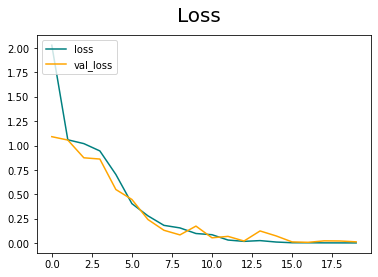

In [13]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

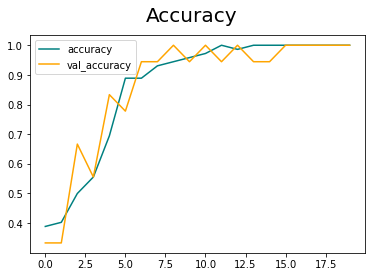

In [14]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [59]:
image = test_generator[0][0][0]
image = np.expand_dims(image, axis=0)

print(image.shape)

(1, 250, 250, 3)


In [60]:
class_probabilities = model.predict(image)

predicted_class = np.argmax(class_probabilities)

1/1 [==============================] - 0s 178ms/step


In [61]:
class_labels[predicted_class]

'chainsaw'

## 7. Saving and Loading Models

In [56]:
model.save("models/my_model.h5")

In [58]:
loaded_model = tf.keras.models.load_model("models/my_model.h5")